# GeoPlots

In this notebook, we'll plot the average Population density calculated from the dataset found on Kaggle (https://www.kaggle.com/walla2ae/world-population).

## Import libraries

In [1]:
import pandas as pd
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Import dataset

We'll import the dataset, and calculate the average population density (for years 1961 to 2015).

In [2]:
dataset = pd.read_csv("data/dataset.csv", skiprows=4)
dataset = dataset.drop(["Indicator Name", "Indicator Code", "1960", "2016", "Unnamed: 61"], axis = 1)
dataset = dataset.dropna(how = 'any')
dataset["avgPopulationDensity"] = dataset.iloc[:, 2:].mean(axis = 1)
dataset.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgPopulationDensity
0,Aruba,ABW,307.972222,312.366667,314.983333,316.827778,318.666667,320.622222,322.494444,324.361111,...,562.322222,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,413.944949
1,Andorra,AND,30.587234,32.714894,34.914894,37.170213,39.470213,41.800000,44.159574,46.570213,...,180.591489,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,106.838839
2,Afghanistan,AFG,14.038148,14.312061,14.599692,14.901579,15.218206,15.545203,15.881812,16.235931,...,39.637202,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,25.373379
3,Angola,AGO,4.305195,4.384299,4.464433,4.544558,4.624228,4.703271,4.782892,4.865721,...,15.387749,15.915819,16.459536,17.020898,17.600302,18.196544,18.808215,19.433323,20.070565,9.649583
4,Albania,ALB,60.576642,62.456898,64.329234,66.209307,68.058066,69.874927,71.737153,73.805547,...,108.394781,107.566204,106.843759,106.314635,106.013869,105.848431,105.717226,105.607810,105.444051,99.159197


## Plot data

We'll load in the map of the complete world and then merge it with the dataset we loaded above.

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(dataset, how = 'left', left_on = 'iso_a3', right_on = 'Country Code')

We'll simply plot the average population density now and color them as reds.

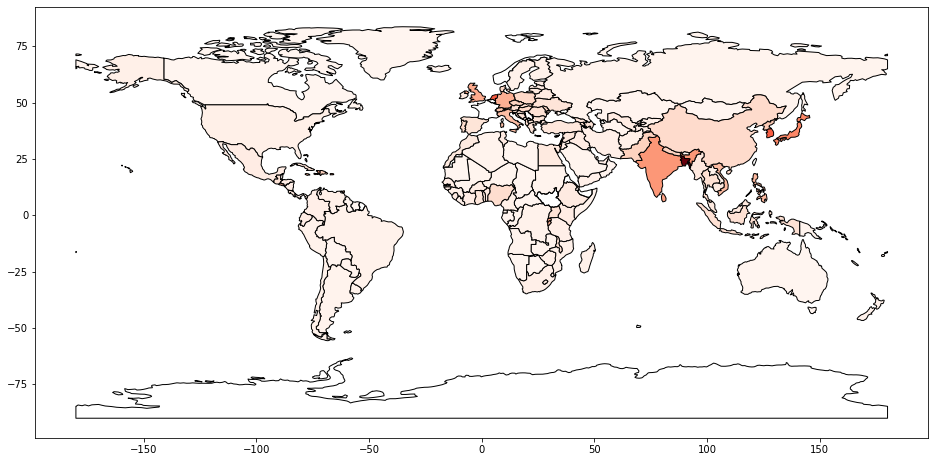

In [4]:
world.plot(column = 'avgPopulationDensity', 
           edgecolor = 'black',
           figsize = (16, 16),
           cmap = 'Reds')

We can clearly see that countries in Asia have more population density values especially India, Bangladesh, Korea and Japan.